# Explanatory Data Analysis

Your first task is to explore the dataset you’ve been assigned. It’s your responsibility to complete all the to-do steps and generate the following:

- Identify the `type of dataset`
- Print the `list of building IDs`
- Select 3 random building IDs, and for a year within its available data range, determine and print the following: 1) `Start date` 2) `End date` 3) `Latitude` 4) `Longitude` 5) `Building type` 6) `Plot the data from day 1 for the selected buildings`

__Important__: For this exercise, start by scrolling to the last cell and completing the first three `TODO` tasks. When you need to update the `plot_load` function, go to the cell above, make the necessary changes, and then return to the last cell to continue.`

__TIP__: Please refer to the table below to view the data ranges and example building IDs for each dataset.

```
| Dataset    | Data Range  | Example ID     |
|------------|-------------|----------------|
| Ideal      | 2017–2018   | home241        |
| Electricity| 2012–2014   | MT_061         |
| lcl        | 2012–2013   | MAC003538      |
| sceaux     | 2007–2010   | Sceaux         |
| borealis   | 2011        | home25         |
```

Below is a screenshot of the output I generated. Your output should look similar. Feel free to modify the plot or adjust other features for your convenience, but only make changes where you see `# TODO:`. Do not edit any other sections of the code.

![NN model architecture](../../Images/EDA.png)

In [24]:
# ------------------- #
# --- Do Not Edit --- #
# ------------------- #

import os
from pathlib import Path
from buildings_bench import load_torch_dataset
from buildings_bench.transforms import TimestampTransform
import matplotlib.pyplot as plt
import numpy as np

os.environ["BUILDINGS_BENCH"] = "/global/cfs/cdirs/m4388/Project4/Dataset"

class EDA:
    def __init__(self, dataset_name, dataset):
        self.name = dataset_name
        self.datasets = dataset.building_datasets

    @staticmethod
    def reconstruct_datetime(data, year):
        timestamp = np.concatenate([
            data['day_of_year'],
            data['day_of_week'],
            data['hour_of_day']
        ], axis=-1)

        timestamp = TimestampTransform().undo_transform(timestamp)

        dt = (
            np.datetime64(f'{year}-01-01')
            + np.timedelta64(1, 'D') * (timestamp[..., 0] - 1)
            + np.timedelta64(1, 'h') * timestamp[..., -1]
        )

        return dt, timestamp

    def dataset_summary(self):
        print(f"Dataset: {self.name}")
        print(f"Type: {type(self.datasets)}")
        print(f"Building IDs: {list(self.datasets.keys())}")

    def building_summary(self, building_id, year):
        ds = dict(self.datasets[building_id])

        data_start = ds[year][0]
        data_end = ds[year][len(ds[year])]

        dt_start, _ = self.reconstruct_datetime(data_start, year)
        dt_end, _ = self.reconstruct_datetime(data_end, year)

        lat = float(data_start['latitude'][0][0])
        lon = float(data_start['longitude'][0][0])
        btype = int(data_start['building_type'][0][0])

        print(f"Building ID: {building_id}")
        print(f"Year: {year}")
        print(f"Number of records in {building_id}: {len(ds[year])}")
        print(f"Start date: {dt_start[0]}")
        print(f"End date: {dt_end[-1]}")
        print(f"Latitude: {lat:.4f}")
        print(f"Longitude: {lon:.4f}")
        print(f"Building Type: {btype}")

    def plot_load(self, building_id, year, day):
        ds = dict(self.datasets[building_id])

        if day < 0 or day >= len(ds[year]):
            print(f"Invalid day index: {day}. Valid range is 0 to {len(ds[year])-1}.")
            return

        data = ds[year][day]
        dt, _ = self.reconstruct_datetime(data, year)
        load = data['load'].squeeze()

        lat = float(data['latitude'][0][0])
        lon = float(data['longitude'][0][0])
        btype = int(data['building_type'][0][0])

# ------------------- #
# --- Do Not Edit --- #
# ------------------- #   

# ------------------- #
# ------ EDIT ------- #
# ------------------- # 
        
        # Do not start editing this section until you have completed the first three TODO tasks in the cell below. 
        # Once those tasks are complete, you may continue with method update.
        # plt.figure(figsize=(12, 4))
        # TODO: Plot load values against datetime (converted to minute-level resolution)
        # TODO: Set x-axis label to 'Datetime'
        # TODO: Set y-axis label to 'Load (kW)'
        # TODO: Set the plot title with building ID, year, day index, latitude, longitude, and building type
        # TODO: Rotate x-axis tick labels for better readability
        # TODO: Apply tight layout to prevent label cutoff
        # TODO: Display a grid to improve visual clarity 
        # plt.show()
        
# ------------------- #
# ------ EDIT ------- #
# ------------------- #

        # Do not start editing this section until you have completed the first three TODO tasks in the cell below. 
        # Once those tasks are complete, you may continue with method update.
        plt.figure(figsize=(12, 4))
        # TODO: Plot load values against datetime (converted to minute-level resolution)
        plt.plot(dt, load)
        # TODO: Set x-axis label to 'Datetime'
        plt.xlabel('Datetime')
        # TODO: Set y-axis label to 'Load (kW)'
        plt.ylabel('Load (kW)')
        # TODO: Set the plot title with building ID, year, day index, latitude, longitude, and building type
        plt.title(f'Building {building_id} - Year {year} - Day {day} - Lat: {lat:.4f} - Lon: {lon:.4f} - Type: {btype}')
        # TODO: Rotate x-axis tick labels for better readability
        plt.xticks(rotation=45)
        # TODO: Apply tight layout to prevent label cutoff
        plt.tight_layout()
        # TODO: Display a grid to improve visual clarity 
        plt.grid(True)
        plt.show()



/global/homes/k/kareem8/.conda/envs/BuildingsBenchEnv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/global/homes/k/kareem8/.conda/envs/BuildingsBenchEnv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/global/homes/k/kareem8/.conda/envs/BuildingsBenchEnv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/global/homes/k/kareem8/.conda/envs/BuildingsBenchEnv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will 

Dataset: Electricity
Type: <class 'dict'>
Building IDs: ['MT_001', 'MT_002', 'MT_003', 'MT_004', 'MT_005', 'MT_006', 'MT_007', 'MT_008', 'MT_009', 'MT_010', 'MT_011', 'MT_012', 'MT_013', 'MT_014', 'MT_015', 'MT_016', 'MT_017', 'MT_018', 'MT_019', 'MT_020', 'MT_021', 'MT_022', 'MT_023', 'MT_024', 'MT_025', 'MT_026', 'MT_027', 'MT_028', 'MT_029', 'MT_030', 'MT_031', 'MT_032', 'MT_033', 'MT_034', 'MT_035', 'MT_036', 'MT_037', 'MT_038', 'MT_039', 'MT_040', 'MT_041', 'MT_042', 'MT_043', 'MT_044', 'MT_045', 'MT_046', 'MT_047', 'MT_048', 'MT_049', 'MT_050', 'MT_051', 'MT_052', 'MT_053', 'MT_054', 'MT_055', 'MT_056', 'MT_057', 'MT_058', 'MT_059', 'MT_060', 'MT_061', 'MT_062', 'MT_063', 'MT_064', 'MT_065', 'MT_067', 'MT_068', 'MT_069', 'MT_070', 'MT_071', 'MT_072', 'MT_073', 'MT_074', 'MT_075', 'MT_076', 'MT_077', 'MT_078', 'MT_079', 'MT_080', 'MT_081', 'MT_082', 'MT_083', 'MT_084', 'MT_085', 'MT_086', 'MT_087', 'MT_088', 'MT_089', 'MT_090', 'MT_091', 'MT_092', 'MT_093', 'MT_094', 'MT_095', 'MT

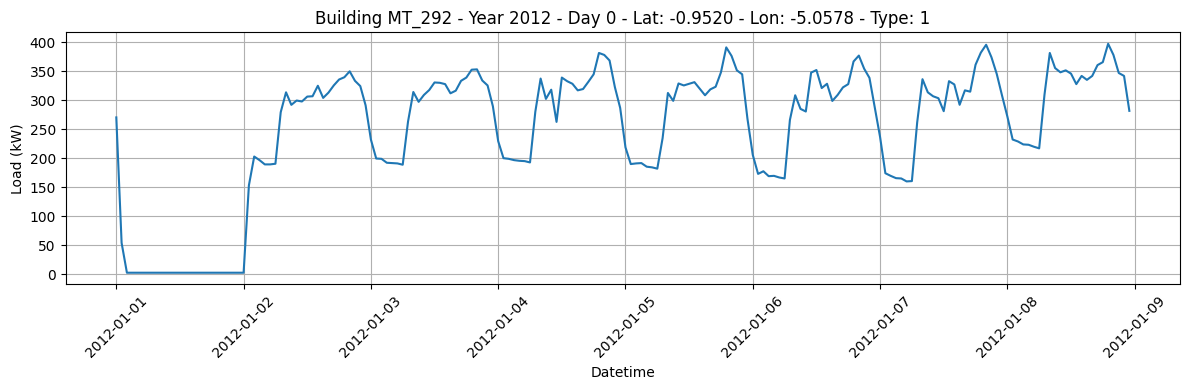

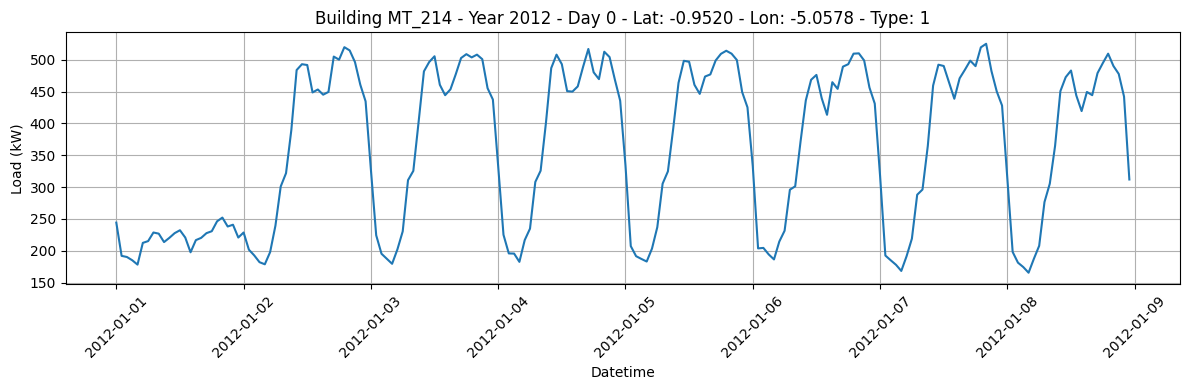

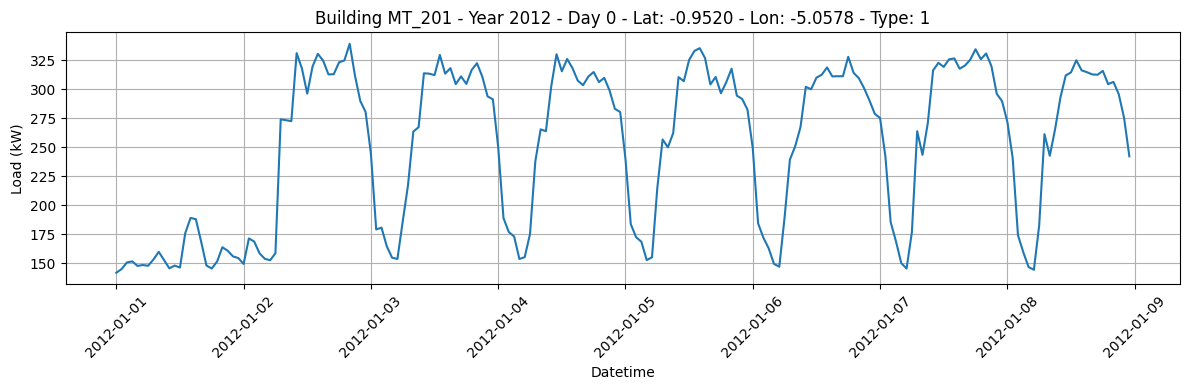

In [25]:
# if __name__ == "__main__":
#     dataset_name = 'Electricity'# Dataset Name
#     dataset = load_torch_dataset(dataset_name, apply_scaler_transform='')
#     # TODO: Instantiate the EDA class
#     # TODO: Run dataset_summary method
#     # TODO: Select 3 random building_ids and then run the building_summary method with appropriate data
#     # TODO: Update the plot_load function to include code for plotting data
#     # TODO: Call the plot_load function and plot for day 1

if __name__ == "__main__":
    dataset_name = 'Electricity'  
    dataset = load_torch_dataset(dataset_name, apply_scaler_transform='')

    # Instantiate the EDA class
    eda = EDA(dataset_name, dataset)

    # Run dataset_summary method
    eda.dataset_summary()

    # Select 3 random building_ids and run the building_summary method
    import random
    building_ids = list(dataset.building_datasets.keys())
    random_ids = random.sample(building_ids, 3)
    for building_id in random_ids:
        eda.building_summary(building_id, year=2012) 

    # Update the plot_load function to include code for plotting data
    # Call the plot_load function and plot for day 1
    for building_id in random_ids:
        eda.plot_load(building_id, year=2012, day=0)  # Plot for day 1

In [14]:
for building_id in random_ids:
    ds = dict(dataset.building_datasets[building_id])
    print(f"Building {building_id} has years: {list(ds.keys())}")


Building MT_018 has years: [2014, 2012, 2013]
Building MT_239 has years: [2014, 2011, 2012, 2013]
Building MT_338 has years: [2014, 2012, 2013]


## Next Step:

`/BuildingsBenchTutorial/Tutorials/Final-Project-Modules/Train-Model.ipynb`